In [112]:
import numpy as np
import pandas as pd

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [114]:
#read dataset

prices_dataset =  pd.read_csv('FX.csv', header=0)
prices_dataset

,Time,Open,High,Low,Close,Volume
0,1/1/10 0:00,1.43283,1.43293,1.43224,1.43293,6.086000e+08
1,1/1/10 0:15,1.43285,1.43295,1.43229,1.43275,5.356000e+08
2,1/1/10 0:30,1.43280,1.43303,1.43239,1.43281,4.363000e+08
3,1/1/10 0:45,1.43285,1.43294,1.43229,1.43276,6.143000e+08
4,1/1/10 1:00,1.43287,1.43292,1.43206,1.43282,7.053000e+08
5,1/1/10 1:15,1.43290,1.43299,1.43212,1.43292,4.273000e+08
6,1/1/10 1:30,1.43267,1.43305,1.43209,1.43282,3.992000e+08
7,1/1/10 1:45,1.43280,1.43302,1.43218,1.43249,4.812000e+08
8,1/1/10 2:00,1.43279,1.43303,1.43237,1.43301,6.076000e+08
9,1/1/10 2:15,1.43301,1.43303,1.43222,1.43271,4.696000e+08


In [115]:
#in this case, float32 is sufficient

prices_dataset = prices_dataset.Close.values.astype('float32')

In [116]:

prices_dataset.shape

(245340,)

In [88]:
#convert the shape in order to split the train & test sets
prices_dataset = prices_dataset.reshape(245340,1)

In [89]:
#confirm the shape is 
prices_dataset.shape

(245340, 1)

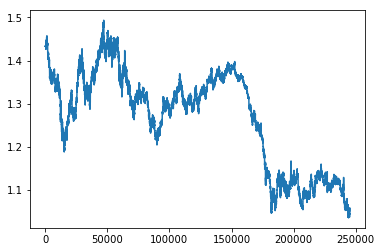

In [90]:
plt.plot(prices_dataset)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
prices_dataset = scaler.fit_transform(prices_dataset)

In [91]:
train_size = int(len(prices_dataset) * 0.70)
test_size = len(prices_dataset) - train_size

In [92]:
train_size, test_size


(171738, 73602)

In [93]:
prices_dataset.shape

(245340, 1)

In [94]:
train = prices_dataset[0:train_size,:]
test = prices_dataset[train_size:len(prices_dataset),:]
print(len(train), len(test))

171738 73602


In [95]:
print((train), (test))

[[ 0.86821532]
 [ 0.86782193]
 [ 0.86795282]
 ..., 
 [ 0.45155573]
 [ 0.45253921]
 [ 0.45173049]] [[ 0.4516871 ]
 [ 0.45155573]
 [ 0.45133734]
 ..., 
 [ 0.03563952]
 [ 0.03487492]
 [ 0.03474355]]


In [96]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [97]:
# reshape into X=t and Y=t+1
#safer to manually code it than use train_split library

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [98]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [99]:
#Now lets contruct LSTM model, which works better than RNN in this case

model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

/Users/taocheng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/Users/taocheng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  


compilation time :  0.016670942306518555


/Users/taocheng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


In [100]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

/Users/taocheng/anaconda/lib/python3.6/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 163149 samples, validate on 8587 samples
Epoch 1/10
163149/163149 [==============================] - 21s - loss: 0.0079 - val_loss: 2.4967e-04
Epoch 2/10
163149/163149 [==============================] - 20s - loss: 6.5491e-04 - val_loss: 2.1766e-05
Epoch 3/10
163149/163149 [==============================] - 20s - loss: 4.4599e-04 - val_loss: 4.7880e-04
Epoch 4/10
163149/163149 [==============================] - 20s - loss: 3.2771e-04 - val_loss: 2.5009e-05
Epoch 5/10
163149/163149 [==============================] - 23s - loss: 2.5786e-04 - val_loss: 2.7914e-05
Epoch 6/10
163149/163149 [==============================] - 20s - loss: 2.1198e-04 - val_loss: 4.8319e-05
Epoch 7/10
163149/163149 [==============================] - 20s - loss: 1.8688e-04 - val_loss: 4.7989e-05
Epoch 8/10
163149/163149 [==============================] - 20s - loss: 1.6891e-04 - val_loss: 9.2095e-05
Epoch 9/10
163149/163149 [==============================] - 19s - loss: 1.5766e-04 - val_loss: 5.3997e-06


In [101]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()

In [102]:

def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs


In [103]:
predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)


[[ 0.45533657]]
[[ 0.19377115]]
[[-0.30823046]]
[[-1.12549818]]
[[-2.03920817]]


[[ 1.24398017]
 [ 1.12427735]
 [ 0.89454138]
 [ 0.52052689]
 [ 0.10237661]]


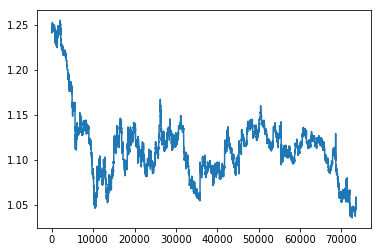

In [104]:
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)

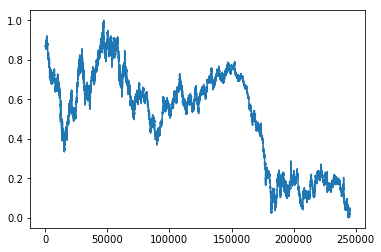

In [105]:
plt.plot(prices_dataset)
plt.show()

In [106]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=32, batch_size=32)

/Users/taocheng/anaconda/lib/python3.6/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/32
171736/171736 [==============================] - 39s - loss: 0.0087    
Epoch 2/32
171736/171736 [==============================] - 39s - loss: 1.0593e-05    
Epoch 3/32
171736/171736 [==============================] - 39s - loss: 2.7641e-06    
Epoch 4/32
171736/171736 [==============================] - 39s - loss: 2.6879e-06    
Epoch 5/32
171736/171736 [==============================] - 39s - loss: 2.6916e-06    
Epoch 6/32
171736/171736 [==============================] - 38s - loss: 2.6992e-06    
Epoch 7/32
171736/171736 [==============================] - 38s - loss: 2.6900e-06    
Epoch 8/32
171736/171736 [==============================] - ETA: 0s - loss: 2.6691e-0 - 40s - loss: 2.6693e-06    
Epoch 9/32
171736/171736 [==============================] - 40s - loss: 2.6655e-06    
Epoch 10/32
171736/171736 [==============================] - 42s - loss: 2.6359e-06    
Epoch 11/32
171736/171736 [==============================] - 41s - loss: 2.6310e-06    
Epoch 12/32
17173

In [107]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [108]:
# invert predictions and targets to unscaled
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [109]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.00 RMSE
Test Score: 0.01 RMSE


In [110]:
# shift predictions of training data for plotting
trainPredictPlot = np.empty_like(stock_prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift predictions of test data for plotting
testPredictPlot = np.empty_like(stock_prices)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(stock_prices)-1, :] = testPredict

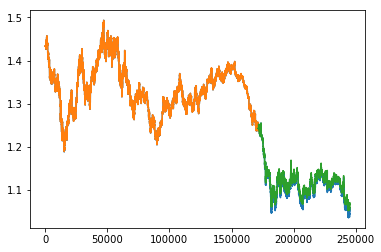

In [111]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(stock_prices))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()